In [1]:
import sys
sys.path.append("../classes")

import MNIST_data
import multi_digit_recognition as mdr
from sklearn.cross_validation import train_test_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

##### We generate the dataset invoking the MNIST class. We take 50000 images, with maximum lenght of 3 digits. We then divide them into 40000 training examples, 5000 validation examples, and 5000 testing examples

In [2]:
data = MNIST_data.MNIST()
X_train, y_train = data.synthetize_data(nb_examples=50000, output_method="digits", min_length=1, max_length=3)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size = 0.8, test_size=0.2, random_state=0)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, train_size = 0.5, test_size=0.5, random_state=0)

Extracting ../MNIST_data/train-images-idx3-ubyte.gz
Extracting ../MNIST_data/train-labels-idx1-ubyte.gz
Extracting ../MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../MNIST_data/t10k-labels-idx1-ubyte.gz


##### Checking if the number of single digit, two digit and three digit instances is balanced in the training set

In [3]:
yy = y_train[:,1:]
print "Number of training instances with one digit: ", len(yy[yy[:,1]==10])
print "Number of training instances with two digit: ", len(yy) - len(yy[yy[:,1]==10]) - len(yy[yy[:,2]!=10])
print "Number of training instances with three digits: ", len(yy[yy[:,2]!=10])

Number of training instances with one digit:  13303
Number of training instances with two digit:  13415
Number of training instances with three digits:  13282


## First Convolutional Structure

##### We use two convolutional layers with relu activation, followed by max pooling operations

In [4]:
structure1 = [("conv", {"patch_x": 5, "patch_y": 5, "depth": 32, "channels": 1}),
                 ("pool", {"side": 2, "stride": 2, "pad": "SAME"}),
                 ("conv", {"patch_x": 5, "patch_y": 5, "depth": 64, "channels": 32}),
                 ("pool", {"side": 2, "stride": 2, "pad": "SAME"})]

model1 = mdr.Multi_Digit(structure=structure1, nb_classes=11, img_rows=28, img_cols=3*28, max_nb_digits=3)

In [5]:
seed = 100
model1.fit(X_train, y_train, X_valid, y_valid, X_test, y_test, batch_size=128, nb_epochs=2000, logging_info=100,
      seed=seed, p_dropout=0.9, save_path="MNIST_Multi_1.ckpt")

Minibatch loss value at step 1: 32.15
Minibatch digit accuracy: 3.6%, full sequence accuracy: 0.0%
Validation set digit accuracy: 36.2%, full sequence accuracy: 3.2%
Minibatch loss value at step 101: 3.01
Minibatch digit accuracy: 66.7%, full sequence accuracy: 32.8%
Validation set digit accuracy: 70.8%, full sequence accuracy: 34.3%
Minibatch loss value at step 201: 1.23
Minibatch digit accuracy: 87.0%, full sequence accuracy: 66.4%
Validation set digit accuracy: 88.6%, full sequence accuracy: 69.2%
Minibatch loss value at step 301: 0.76
Minibatch digit accuracy: 94.0%, full sequence accuracy: 82.8%
Validation set digit accuracy: 93.2%, full sequence accuracy: 80.6%
Minibatch loss value at step 401: 0.73
Minibatch digit accuracy: 93.5%, full sequence accuracy: 80.5%
Validation set digit accuracy: 94.8%, full sequence accuracy: 85.2%
Minibatch loss value at step 501: 0.35
Minibatch digit accuracy: 96.6%, full sequence accuracy: 90.6%
Validation set digit accuracy: 95.5%, full sequence 

##### Accuracies plots

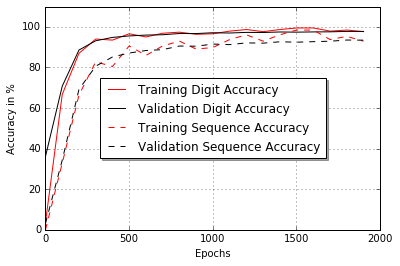

In [23]:
epochs = np.arange(1, 2000, 100)
fig, ax = plt.subplots()
plt.xlabel("Epochs")
plt.ylabel("Accuracy in %")
plt.ylim(0,110)
plt.grid()
ax.plot(epochs, np.array(model1.logger["training_error"])[:,0], 'r', label='Training Digit Accuracy')
ax.plot(epochs, np.array(model1.logger["validation_error"])[:,0], 'k', label='Validation Digit Accuracy')
ax.plot(epochs, np.array(model1.logger["training_error"])[:,1], 'r--', label='Training Sequence Accuracy')
ax.plot(epochs, np.array(model1.logger["validation_error"])[:,1], 'k--', label='Validation Sequence Accuracy')
legend = ax.legend(loc='center', shadow=True)
plt.savefig("../../report/figs/MNIST_Multi1.jpg")
plt.show()

##### Test set accuracies

In [30]:
print "Test digit accuracy: {:.1f}%".format(model1.logger["test_error"][0][0])
print "Test sequence accuracy: {:.1f}%".format(model1.logger["test_error"][0][1])

Test digit accuracy: 97.6%
Test sequence accuracy: 93.1%


## Second Convolutional Structure

In [31]:
structure2 = [("conv", {"patch_x": 5, "patch_y": 5, "depth": 32, "channels": 1}),
                 ("pool", {"side": 2, "stride": 2, "pad": "SAME"}),
                 ("conv", {"patch_x": 5, "patch_y": 5, "depth": 64, "channels": 32}),
                 ("pool", {"side": 2, "stride": 2, "pad": "SAME"}),
             ("conv", {"patch_x": 5, "patch_y": 5, "depth": 64, "channels": 64})]

model2 = mdr.Multi_Digit(structure=structure2, nb_classes=11, img_rows=28, img_cols=3*28, max_nb_digits=3)

In [32]:
seed = 100
model1.fit(X_train, y_train, X_valid, y_valid, X_test, y_test, batch_size=128, nb_epochs=2000, logging_info=100,
      seed=seed, p_dropout=0.9, save_path="MNIST_Multi_2.ckpt")

Minibatch loss value at step 1: 23.57
Minibatch digit accuracy: 13.5%, full sequence accuracy: 0.8%
Validation set digit accuracy: 36.6%, full sequence accuracy: 3.7%
Minibatch loss value at step 101: 3.49
Minibatch digit accuracy: 68.0%, full sequence accuracy: 28.9%
Validation set digit accuracy: 67.6%, full sequence accuracy: 30.6%
Minibatch loss value at step 201: 1.44
Minibatch digit accuracy: 86.7%, full sequence accuracy: 67.2%
Validation set digit accuracy: 84.6%, full sequence accuracy: 61.2%
Minibatch loss value at step 301: 0.76
Minibatch digit accuracy: 94.5%, full sequence accuracy: 85.2%
Validation set digit accuracy: 93.0%, full sequence accuracy: 80.4%
Minibatch loss value at step 401: 0.63
Minibatch digit accuracy: 94.3%, full sequence accuracy: 82.8%
Validation set digit accuracy: 95.0%, full sequence accuracy: 85.7%
Minibatch loss value at step 501: 0.50
Minibatch digit accuracy: 96.1%, full sequence accuracy: 88.3%
Validation set digit accuracy: 95.6%, full sequence

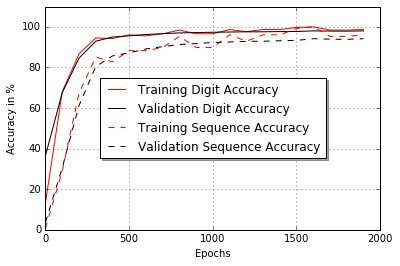

In [39]:
epochs = np.arange(1, 2000, 100)
fig, ax = plt.subplots()
plt.xlabel("Epochs")
plt.ylabel("Accuracy in %")
plt.ylim(0,110)
plt.grid()
ax.plot(epochs, np.array(model2.logger["training_error"])[:,0], 'r', label='Training Digit Accuracy')
ax.plot(epochs, np.array(model2.logger["validation_error"])[:,0], 'k', label='Validation Digit Accuracy')
ax.plot(epochs, np.array(model2.logger["training_error"])[:,1], 'r--', label='Training Sequence Accuracy')
ax.plot(epochs, np.array(model2.logger["validation_error"])[:,1], 'k--', label='Validation Sequence Accuracy')
legend = ax.legend(loc='center', shadow=True)
plt.savefig("../../report/figs/MNIST_Multi2.jpg")
plt.show()

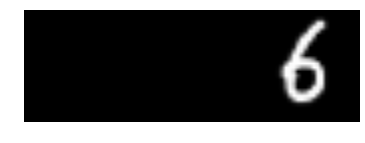

In [45]:
plt.imshow(X_test[1220,:,:,0], cmap="Greys_r")
plt.axis("off")
plt.savefig("../../report/figs/MNIST_Multi4")
plt.show()

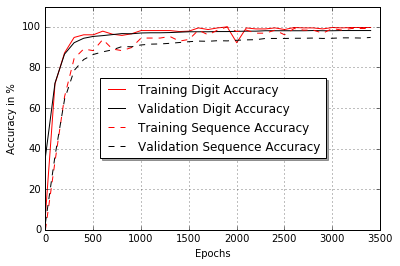

In [6]:
epochs = np.arange(1, 3500, 100)
fig, ax = plt.subplots()
plt.xlabel("Epochs")
plt.ylabel("Accuracy in %")
plt.ylim(0,110)
plt.grid()
train_digit = [7.0, 71.9, 87.2, 94.8, 96.1, 96.1, 97.9, 96.4, 95.8, 96.6, 98.2, 98.2, 98.2, 98.2 ,97.7,
              97.9, 99.5, 98.7, 99.5, 100, 92.2, 99.5, 99.0, 99.0, 99.5, 98.7, 99.7, 99.5, 99.5, 99.0, 99.7, 99.5, 99.7,
              99.7, 99.7]
train_full = [0.0, 33.6, 65.6, 84.4, 89.1, 88.3 ,93.8 ,89.1 ,88.3 ,89.8 ,94.5 ,94.5 ,94.5 ,95.3 ,93.0,
             93.8, 98.4, 96.1, 98.4, 100, 97.7, 98.4, 96.9, 96.9, 98.4, 96.1, 99.2, 98.4, 98.4, 96.9, 99.2, 98.4, 99.2,
              99.2, 99.2]

valid_digit = [35.9, 72.3, 86.6, 92.2, 94.4, 95.3, 95.7, 96.2, 96.7, 96.6, 97.0, 97.1, 97.1, 97.2, 97.4,
              97.6, 97.6, 97.6, 97.7, 97.7, 97.8, 97.9, 97.9, 98.1, 98.1, 98.1, 98.1, 98.1, 98.2, 98.1, 98.1, 98.2, 98.2,
              98.2, 98.2]
valid_full = [3.4, 36.3, 64.3, 78.5, 83.9, 86.4, 87.7, 88.7, 90.3, 90.2, 91.1, 91.5, 91.6, 91.9, 92.3,
             92.7, 93.0, 92.9, 93.2, 93.1, 93.4, 93.6, 93.7, 94.3, 94.3, 94.3, 94.4, 94.4, 94.5, 94.3, 94.4, 94.6, 94.6,
              94.5, 94.8]

ax.plot(epochs, np.array(train_digit), 'r', label='Training Digit Accuracy')
ax.plot(epochs, np.array(valid_digit), 'k', label='Validation Digit Accuracy')
ax.plot(epochs, np.array(train_full), 'r--', label='Training Sequence Accuracy')
ax.plot(epochs, np.array(valid_full), 'k--', label='Validation Sequence Accuracy')
legend = ax.legend(loc='center', shadow=True)
plt.savefig("../../report/figs/MNIST_Multi3.jpg")
plt.show()